In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('concrete_data.csv')
df.head(6)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03


In [3]:
df.shape

(1030, 9)

In [4]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [5]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
X = df.iloc[:,0:8]
y = df.iloc[:,-1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
print('Accuracy :',cross_val_score(lr,X_test,y_test,cv=5).mean())

Accuracy : 0.5054529668069895


In [10]:
X_train.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'],
      dtype='object')

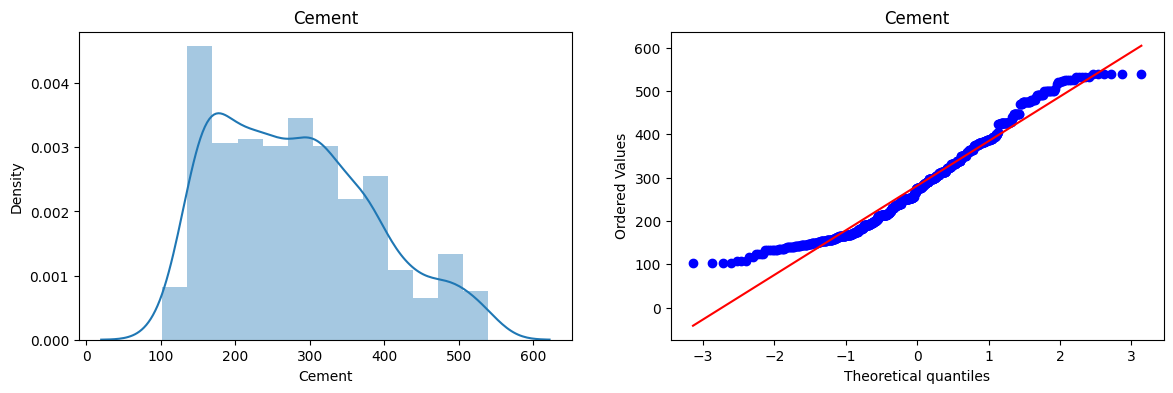

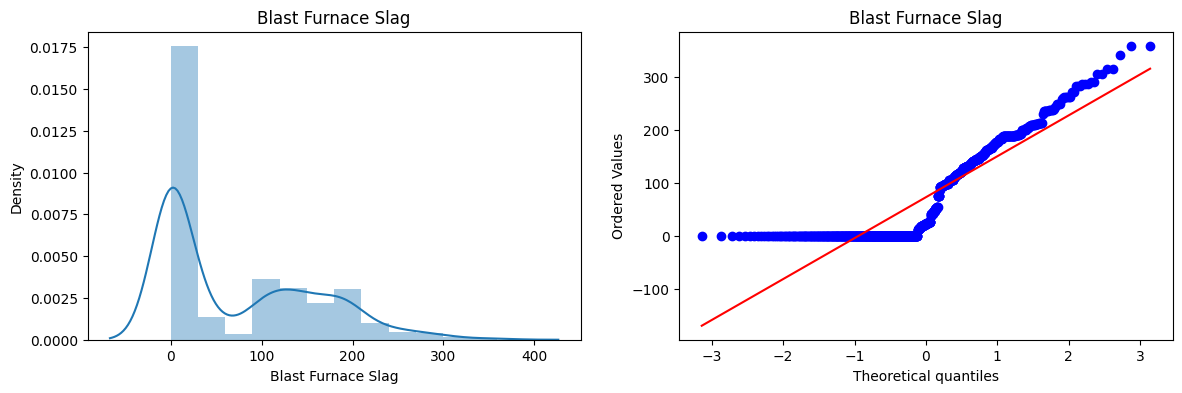

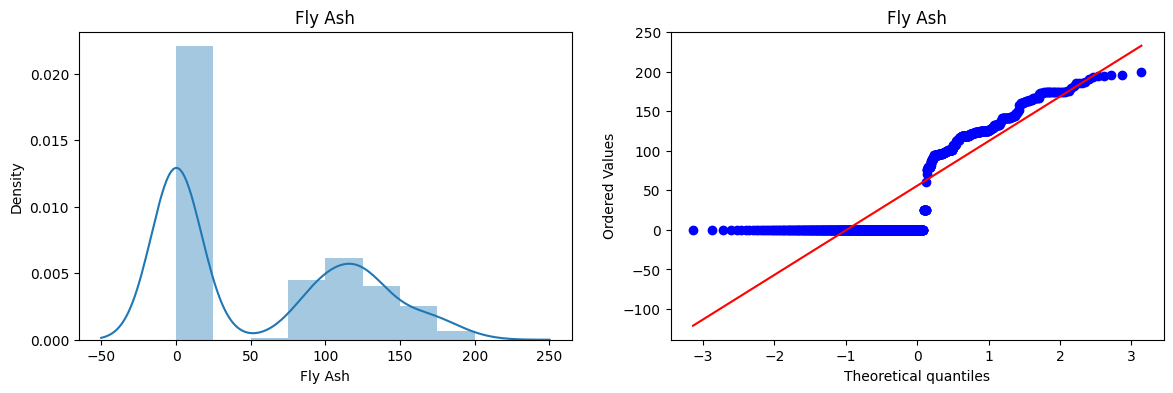

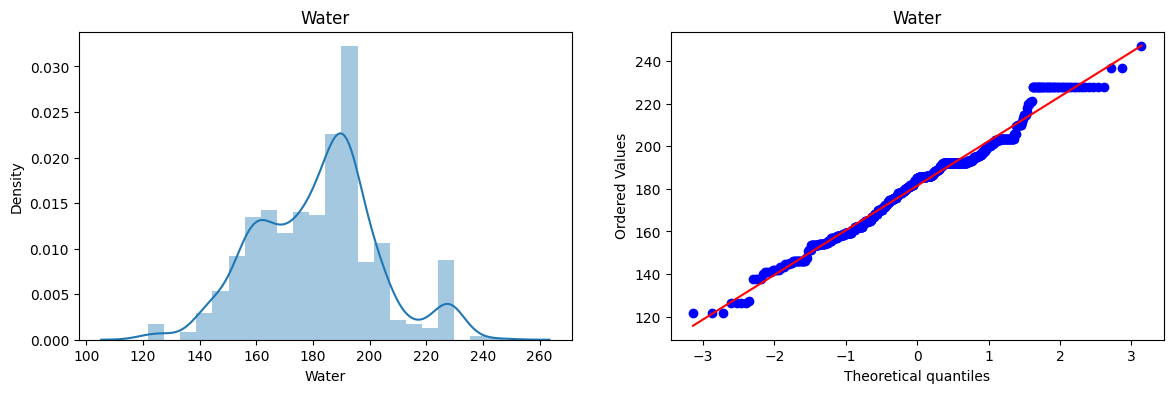

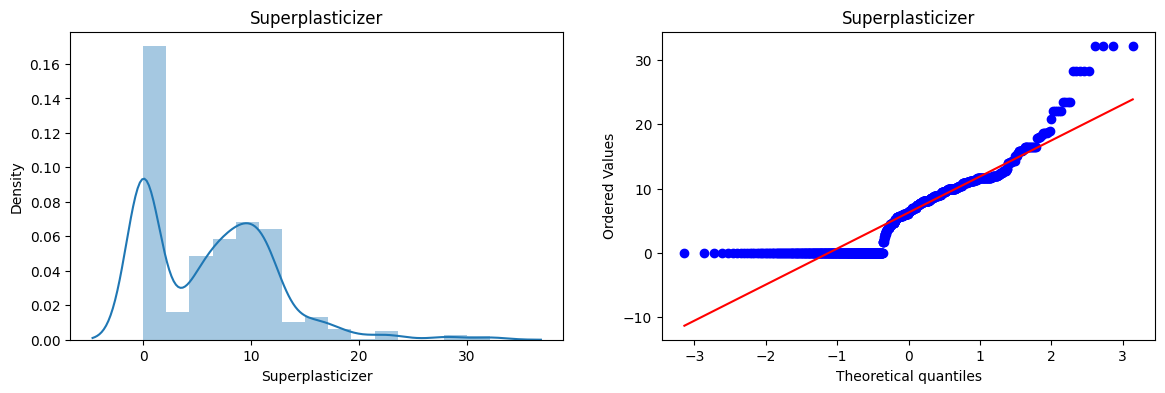

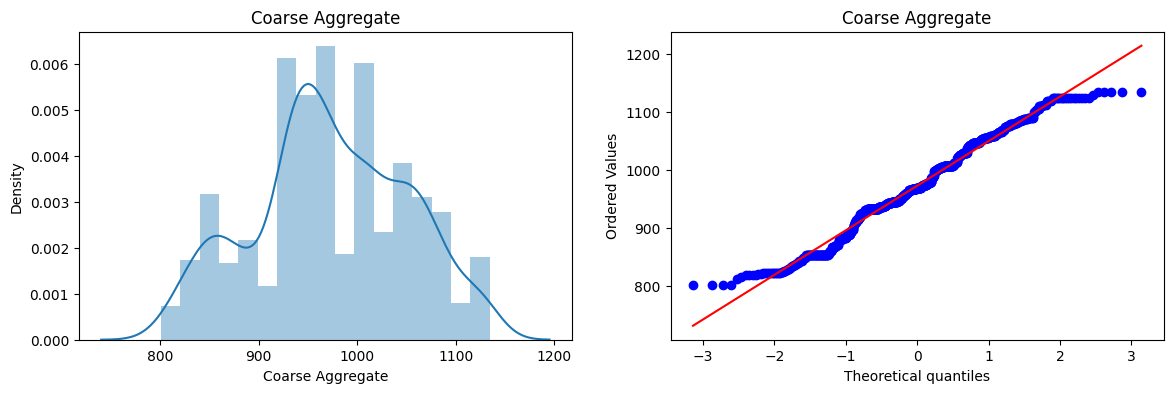

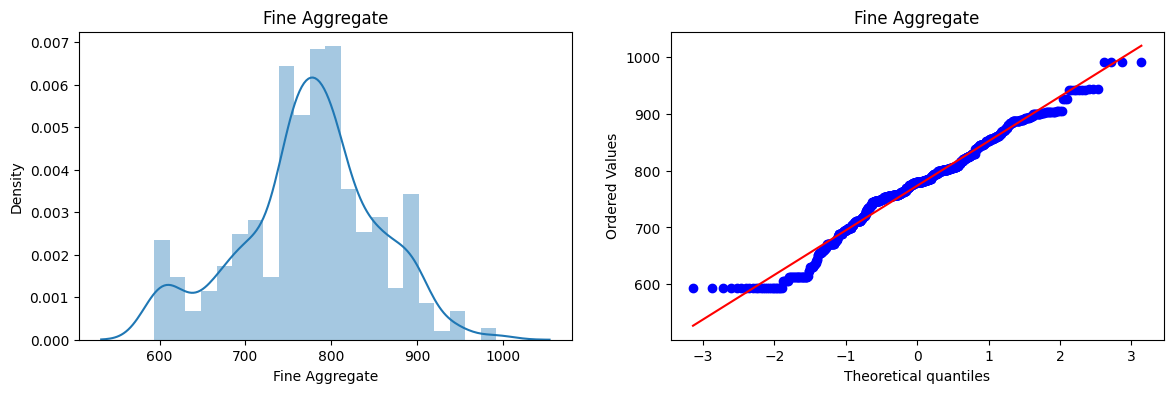

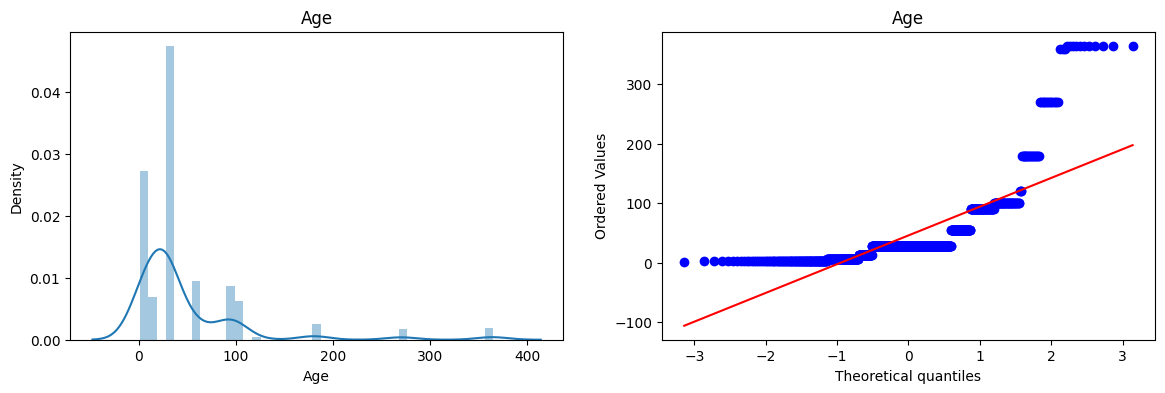

In [11]:
for cols in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[cols])
    plt.title(cols)
    
    plt.subplot(122)
    stats.probplot(X_train[cols],dist='norm',plot=plt)
    plt.title(cols)
    plt.show()

In [12]:
# Power Transform Box-Cox
pt = PowerTransformer(method='box-cox')

X_train_transform = pt.fit_transform(X_train+0.00001)
X_test_transform = pt.transform(X_test+0.00001)

In [13]:
pd.DataFrame({'cols':X_train.keys(),'lambda':pt.lambdas_})

,cols,lambda
0,Cement,0.175905
1,Blast Furnace Slag,0.031239
2,Fly Ash,-0.026422
3,Water,0.768828
4,Superplasticizer,0.123049
5,Coarse Aggregate,1.215968
6,Fine Aggregate,1.844220
7,Age,0.056825


In [14]:
lr.fit(X_train_transform,y_train)
print("Accuracy After Transform :",cross_val_score(lr,X_test_transform,y_test).mean())

Accuracy After Transform : 0.7441774088578617


In [15]:
X_train_transform = pd.DataFrame(X_train_transform,columns=X_train.columns)

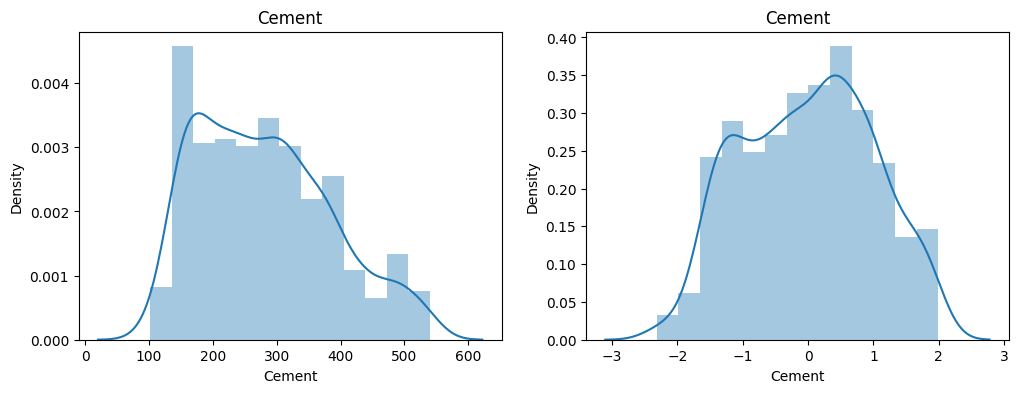

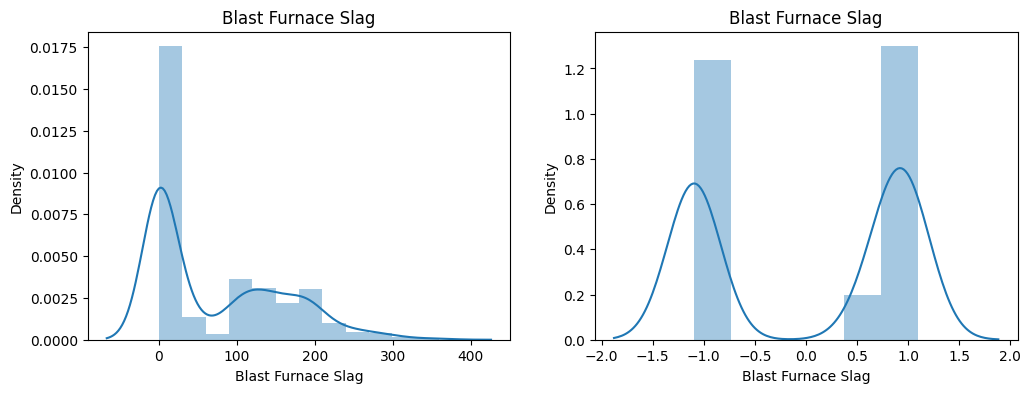

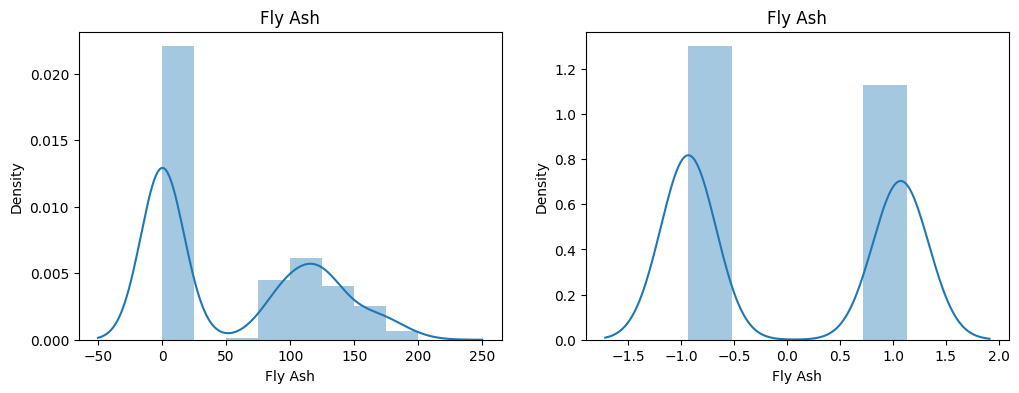

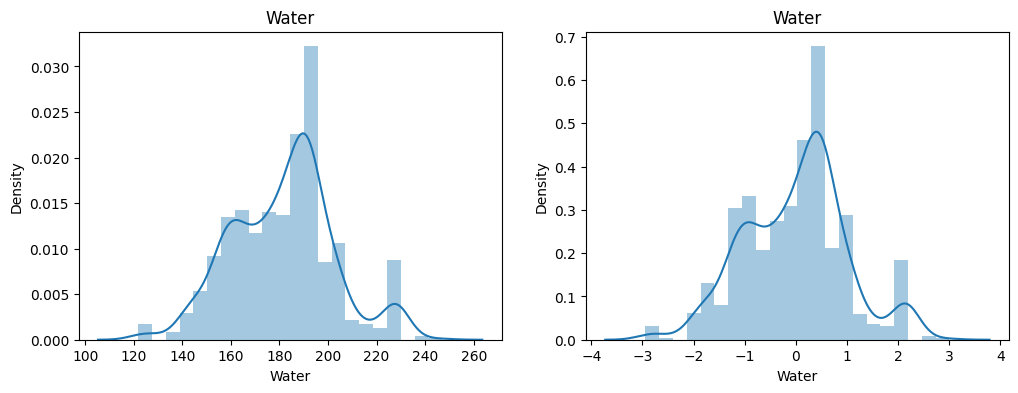

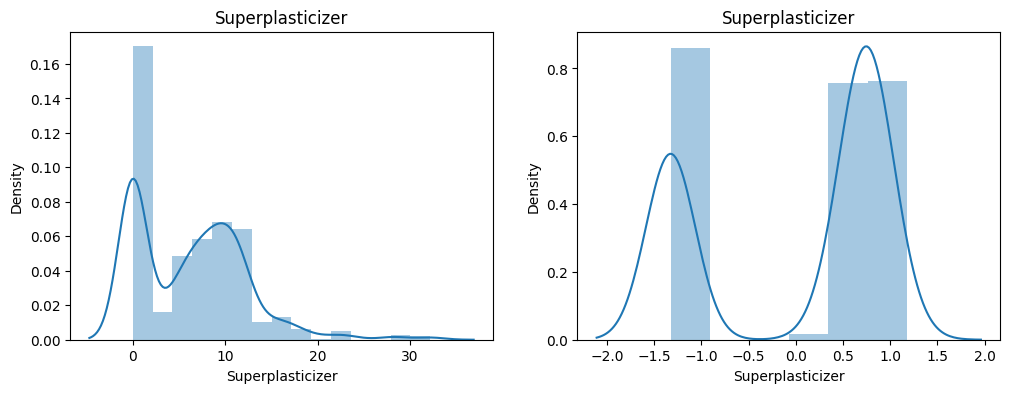

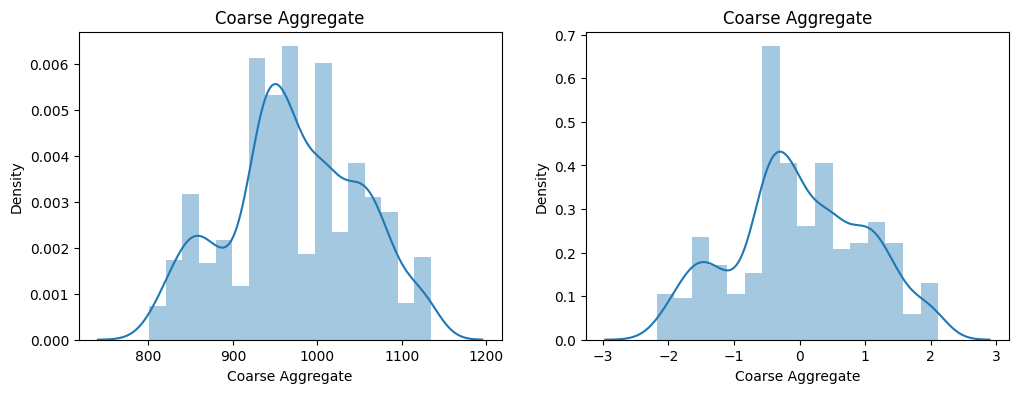

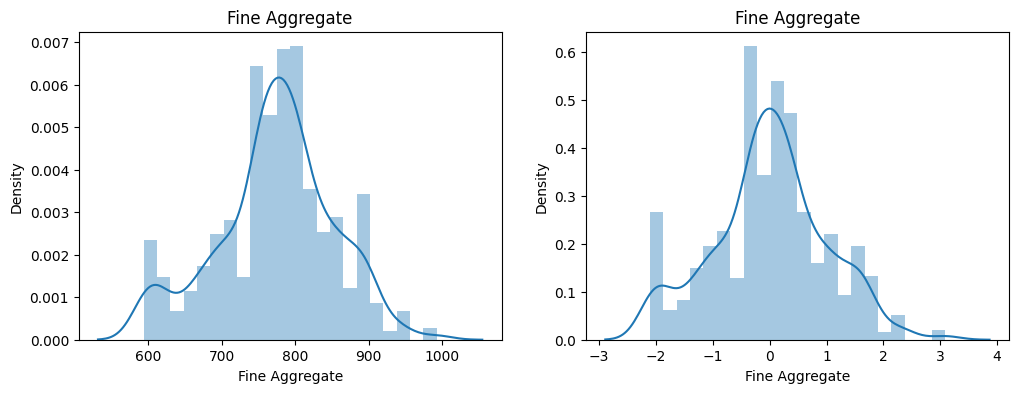

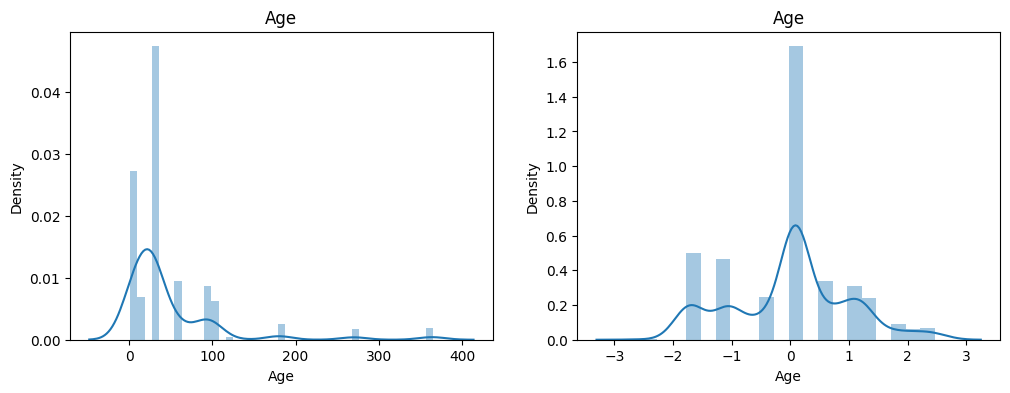

In [16]:
for col in X_train_transform.columns:
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)
    
    plt.subplot(122)
    sns.distplot(X_train_transform[col])
    plt.title(col)
    plt.show()

In [19]:
# Power Transform by Yeo-Johnson

pt1 = PowerTransformer()
X_train_transform2 = pt1.fit_transform(X_train)
X_test_transform2 = pt1.transform(X_test)

lr.fit(X_train_transform2,y_train)
cross_val_score(lr,X_test_transform2,y_test).mean()

0.7534602532874728

In [21]:
pd.DataFrame({'cols':X_train.keys(),'box-cox-Lambda':pt.lambdas_,'yeo-Lambda':pt1.lambdas_})

,cols,box-cox-Lambda,yeo-Lambda
0,Cement,0.175905,0.173187
1,Blast Furnace Slag,0.031239,0.022243
2,Fly Ash,-0.026422,-0.101701
3,Water,0.768828,0.767491
4,Superplasticizer,0.123049,0.277832
5,Coarse Aggregate,1.215968,1.216293
6,Fine Aggregate,1.844220,1.845362
7,Age,0.056825,0.010651
